## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_df = pd.DataFrame(mouse_metadata)
study_df = pd.DataFrame(study_results)

# Combine the data into a single dataset
mouse_data_df = pd.merge(mouse_df, study_df, on="Mouse ID")

# Display the data table for preview
mouse_data_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
num_mice = mouse_data_df["Mouse ID"].unique()
len(num_mice)

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_dup = mouse_data_df.loc[mouse_data_df.duplicated(subset=["Mouse ID","Timepoint",]),"Mouse ID"].unique()


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mousedup_id = pd.DataFrame(mice_dup)


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_df.drop_duplicates("Mouse ID")

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [8]:
# Checking the number of mice in the clean DataFrame.
c_df = mouse_data_df["Mouse ID"].value_counts()
cm = len(c_df)
cm

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_data_df["Tumor Volume (mm3)"].describe()
 
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
d_reg = mouse_data_df.groupby("Drug Regimen")
#d_reg.head(5)
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tm = d_reg["Tumor Volume (mm3)"].mean()
tmed = d_reg["Tumor Volume (mm3)"].median()
tv = d_reg["Tumor Volume (mm3)"].var()
tstd = d_reg["Tumor Volume (mm3)"].std()
tsem = d_reg["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary dataframe.
tv_sum_df = pd.DataFrame({"Mean": tm, "Median": tmed, "Variance": tv, "Standard Deviation": tstd, "SEM": tsem})
tv_sum_df



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
d_reg["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

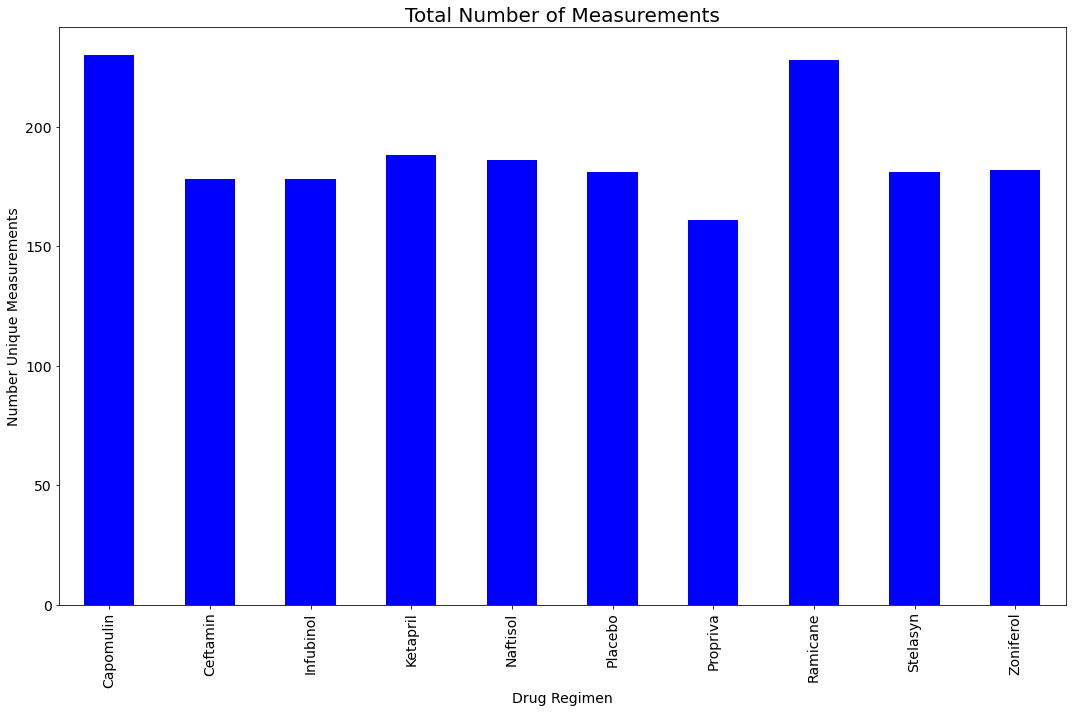

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

m_drug = mouse_data_df.groupby(["Drug Regimen"]).count()["Mouse ID"]


plot_measurements = m_drug.plot.bar(figsize=(15,10), color='b',fontsize = 14)

plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number Unique Measurements",fontsize = 14)
plt.title("Total Number of Measurements",fontsize = 20)

plt.savefig("../Images/measurements_drug.png", bbox_inches = "tight")
plt.tight_layout()
plt.show()


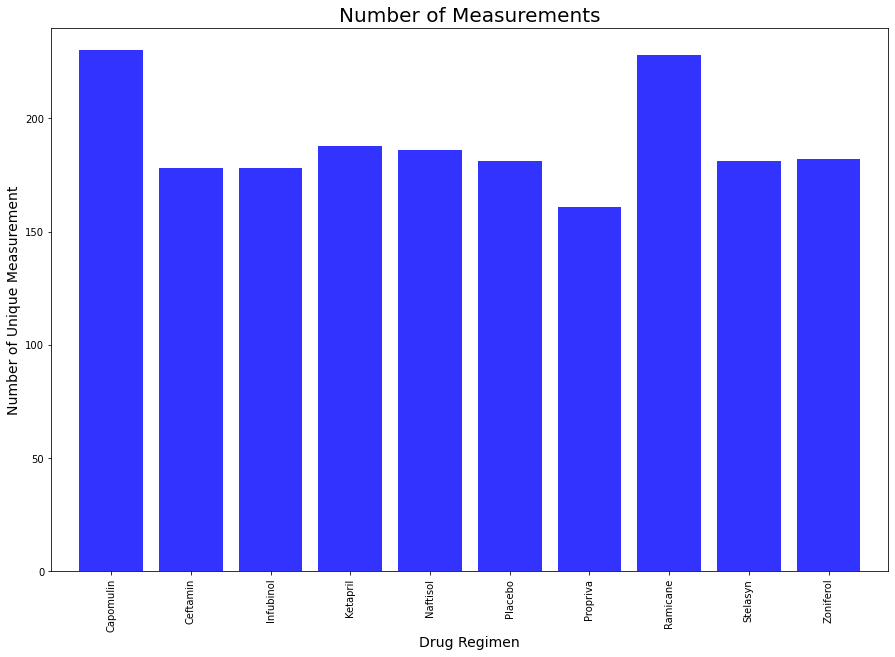

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
dct  =(mouse_data_df.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
dct
import numpy as np
x_axis = np.arange(len(m_drug))
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.bar(x_axis, dct, color='b', alpha=0.8, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(dct)+10)

plt.title("Number of Measurements",fontsize = 20)
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Unique Measurement",fontsize = 14)

plt.savefig("../Images/measurements_pyplot.png", bbox_inches = "tight")



C:\Users\ddray\anaconda03\envs\PythonData\lib\site-packages\ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.


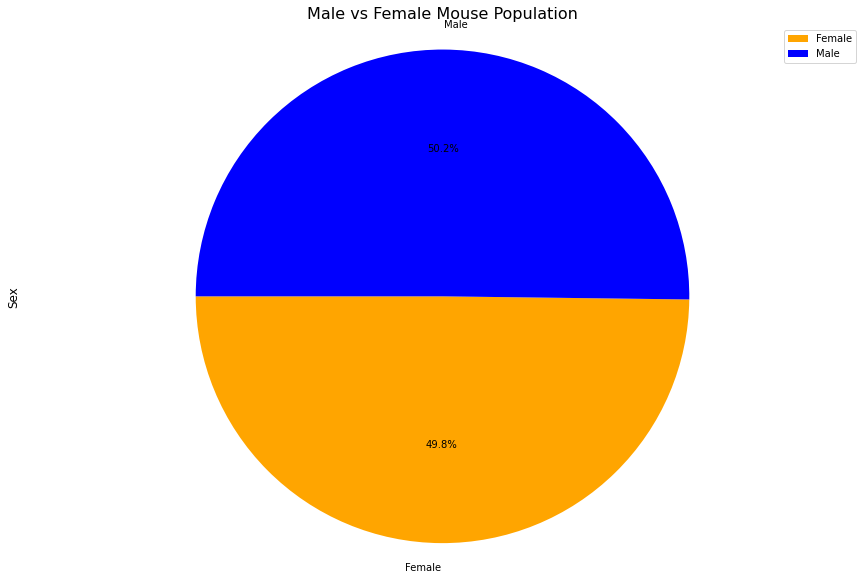

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender = mouse_data_df.groupby(["Mouse ID","Sex"])

gender_df = pd.DataFrame(gender.size())

# Create the dataframe with total count of Female and Male mice
mg = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mg.columns = ["Total Count"]


# create and format the percentage of female vs male
mg["Percentage of Sex"] = (100*(mg["Total Count"]/mg["Total Count"].sum()))

# format the "Percentage of Sex" column
mg["Percentage of Sex"] = mg["Percentage of Sex"]

colors = ['orange', 'blue']

plot = mg.plot.pie(y='Total Count',figsize=(15,10), colors = colors, startangle=180, autopct="%.1f%%")

plt.title('Male vs Female Mouse Population',fontsize = 16)
plt.ylabel('Sex',fontsize = 12)
plt.axis("equal",fontsize = 12)

plt.savefig("../Images/pi_pandas.png", bbox_inches = "tight")
plt.show()


C:\Users\ddray\anaconda03\envs\PythonData\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  if sys.path[0] == '':


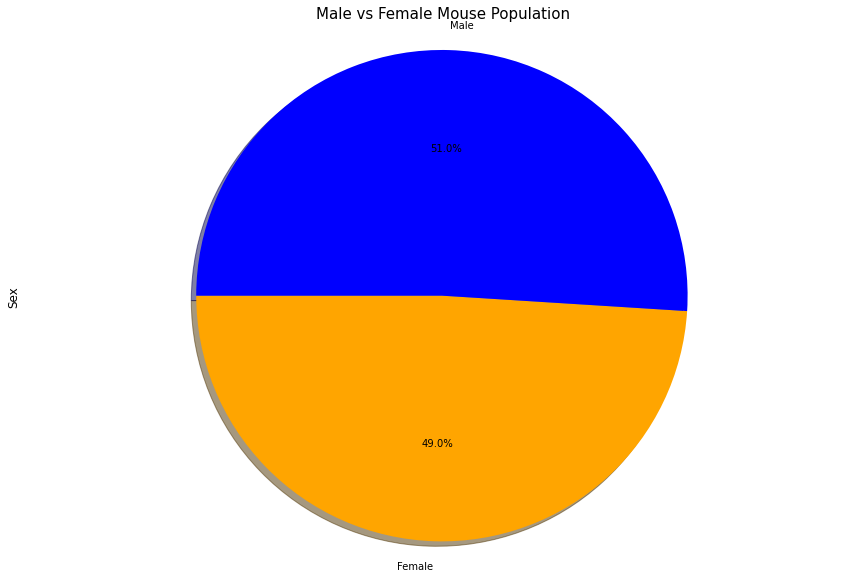

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sizes = [49,51]
colors = ['orange', 'blue']
labels = ["Female","Male"]

#Create the pie chart based upon the values 
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=180,)
plt.title('Male vs Female Mouse Population',fontsize = 15)
plt.ylabel('Sex',fontsize = 12)

plt.axis("equal",fontsize = 12)

plt.savefig("../Images/pi_plot.png", bbox_inches = "tight")
plt.show()


## Quartiles, Outliers and Boxplots

In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
dr_l = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

dr_df = mouse_data_df[mouse_data_df['Drug Regimen'].isin(dr_l)]

#.agg method on groupby mouse ID  
lt = dr_df.groupby(['Drug Regimen','Mouse ID']).agg(\
            Last_tumor_size = ('Tumor Volume (mm3)', lambda x: x.iloc[-1]))



#unstack for drug regimens
lt_dr = lt.stack(level=0).unstack(level=0)
lt_dr.head()


,Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Mouse ID,,,,,
a203,Last_tumor_size,NaN,NaN,67.973419,NaN
a251,Last_tumor_size,NaN,NaN,65.525743,NaN
a275,Last_tumor_size,NaN,62.999356,NaN,NaN
a411,Last_tumor_size,NaN,NaN,NaN,38.407618
a444,Last_tumor_size,NaN,NaN,NaN,43.047543


In [30]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tv_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in treatments:
    ft_vol = mouse_data_df.loc[mouse_data_df["Drug Regimen"] ==x, "Tumor Volume (mm3)"]
    quartiles = ft_vol.quantile([.25,.5,.75])
    uq = quartiles[.75]
    lq = quartiles[.25]
    iqr = uq-lq
    ub = uq + (1.5*iqr)
    tv_data .append(ft_vol)
    lb = lq - (1.5*iqr)
    ub = uq + (1.5*iqr)
    
    # Determine outliers using upper and lower bounds
    print(f'A value below {lb} could be an outlier.')
    print(f'A value below {ub} could be an outlier.')

A value below 26.714832162499995 could be an outlier.
A value below 55.9711007025 could be an outlier.
A value below 24.18658646249998 could be an outlier.
A value below 57.48804812250001 could be an outlier.
A value below 32.309217298749985 could be an outlier.
A value below 72.31757996875001 could be an outlier.
A value below 32.818911426250004 could be an outlier.
A value below 71.19095325625 could be an outlier.


<function matplotlib.pyplot.show(*args, **kw)>

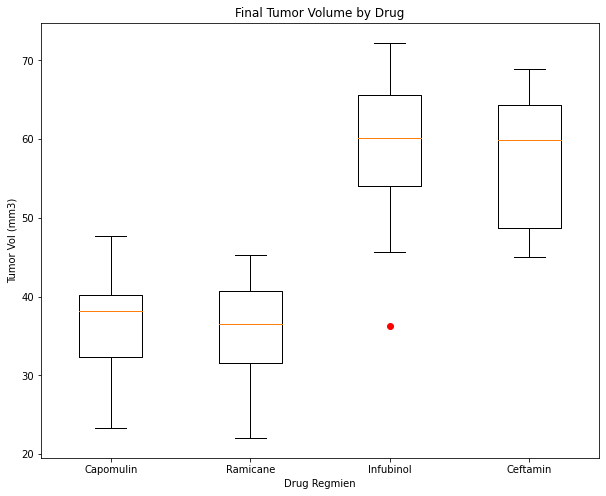

In [32]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot_list = []

#for loop for drug names + append to boxplot_list.  Dropping the NA values as above
for x in treatments: 
        boxplot_list.append(list(lt_dr[x].dropna()))
        
fig1, ax = plt.subplots(figsize=(10,8))
ax.set_title('Final Tumor Volume by Drug')
ax.set_xlabel("Drug Regmien")
ax.set_ylabel("Tumor Vol (mm3)")
ax.boxplot(boxplot_list,notch=0, sym="r")
plt.xticks([1,2,3,4],treatments)

plt.savefig('../Images/boxwhiskerplot.png')

plt.show

## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor Volume vs. Time Point for Mouse m601')

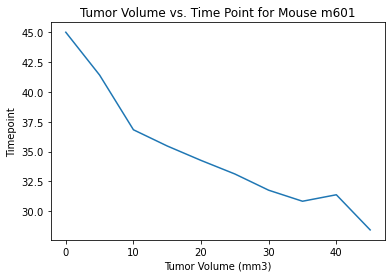

In [36]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_a = mouse_data_df.loc[mouse_data_df["Mouse ID"] == "m601"]

plt.plot(mouse_a["Timepoint"], mouse_a["Tumor Volume (mm3)"])
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Timepoint")
plt.title(f'Tumor Volume vs. Time Point for Mouse m601')


Text(0, 0.5, 'Avg Tumor Volume (mm3)')

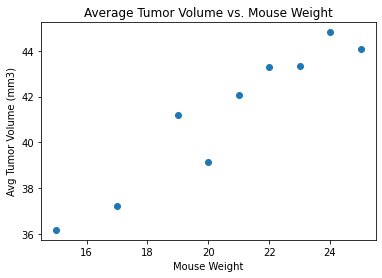

In [24]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
c_dr = mouse_data_df.loc[mouse_data_df["Drug Regimen"] == "Capomulin"]
drug_grams = c_dr.groupby("Weight (g)")
avg_tv = 
plt.scatter(drug_grams["Weight (g)"].unique(), drug_grams["Tumor Volume (mm3)"].mean())
plt.title("Average Tumor Volume vs. Mouse Weight")
plt.xlabel("Mouse Weight")
plt.ylabel("Avg Tumor Volume (mm3)")

## Correlation and Regression

The correllation coefficiant between both factors is 0.84
 The r-squared value is: 0.8419363424694718
 The line equation is: y= 0.95x + 21.55


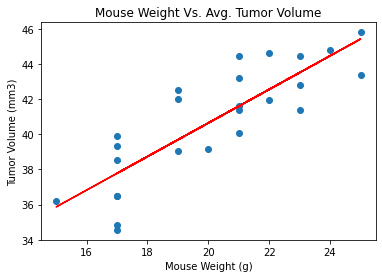

In [41]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_a = mouse_data_df.loc[mouse_data_df["Drug Regimen"] == "Capomulin",:]
at = mouse_a.groupby(['Mouse ID']).mean()
coefficient = st.pearsonr(at['Weight (g)'],at['Tumor Volume (mm3)'])
print(f"The correllation coefficiant between both factors is {round(coefficient[0],2)}")
# for mouse weight and average tumor volume for the Capomulin regimen

#linear reggression
from scipy.stats import linregress
x_values = at["Weight (g)"]
y_values = at['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line = f'y= {str(round(slope,2))}x + {str(round(intercept,2))}'


#plotting
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Mouse Weight Vs. Avg. Tumor Volume")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(F" The r-squared value is: {rvalue}")
print(F" The line equation is: {line}")